<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [4]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [29]:
piplite.install(['pingouin']) 

<PyodideTask pending name='Task-62' coro=<_install() running at /lib/python3.12/site-packages/piplite/piplite.py:105> cb=[WebLoop._decrement_in_progress()]>

In [30]:
import pingouin as pg

In [5]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [6]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [7]:
boston_df=pd.read_csv(boston_url)

**The following describes the dataset variables:**

·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's

In [8]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [43]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Unnamed: 0  506 non-null    int64   
 1   CRIM        506 non-null    float64 
 2   ZN          506 non-null    float64 
 3   INDUS       506 non-null    float64 
 4   CHAS        506 non-null    float64 
 5   NOX         506 non-null    float64 
 6   RM          506 non-null    float64 
 7   AGE         506 non-null    float64 
 8   DIS         506 non-null    float64 
 9   RAD         506 non-null    float64 
 10  TAX         506 non-null    float64 
 11  PTRATIO     506 non-null    float64 
 12  LSTAT       506 non-null    float64 
 13  MEDV        506 non-null    float64 
 14  age_group   506 non-null    category
dtypes: category(1), float64(13), int64(1)
memory usage: 56.0 KB


In [41]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


#### Add your code below following the instructions given in the course to complete the peer graded assignment


# Task 2: Generate Descriptive Statistics and Visualizations

**Ques. 1: For the "Median value of owner-occupied homes" provide a boxplot.**

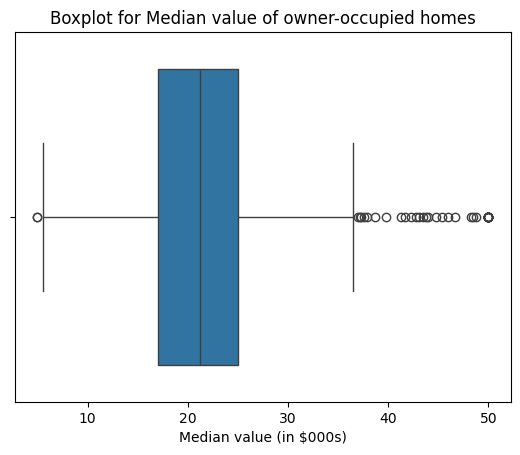

In [45]:
sns.boxplot(x= 'MEDV', data = boston_df)
plt.title('Boxplot for Median value of owner-occupied homes')
plt.xlabel('Median value (in $000s)')
plt.show()

**Findings:**

1. Median value of the owner occupied homes lie around USD 21-22K.
2. Large no. of the outliers lie above USD 37K which might indicate housing price instability.
3. As per the boxplot, data seems to be right skewed with a long tail of expensive homes.

**Ques. 2: Provide a  bar plot for the Charles river variable.**

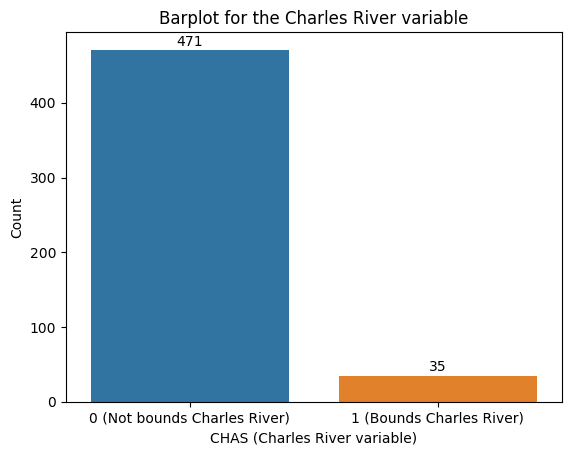

In [10]:
ax = sns.countplot(x = 'CHAS', data = boston_df, hue ='CHAS', legend = False)
plt.title('Barplot for the Charles River variable')
plt.ylabel('Count')
plt.xlabel('CHAS (Charles River variable)')
plt.xticks([0, 1], ['0 (Not bounds Charles River)', '1 (Bounds Charles River)'])

# adding data labels
for container in ax.containers:
    ax.bar_label(container, label_type='edge',padding = 1)

plt.show()

In [11]:
chas_percentages = round(boston_df['CHAS'].value_counts(normalize = True)*100,2)
chas_percentages

CHAS
0.0    93.08
1.0     6.92
Name: proportion, dtype: float64

**Findings:**

1. Mostly homes (471) in the dataset are not near the Charles river (93.08% to be precise).

**Ques.3: Provide a boxplot for the MEDV variable vs the AGE variable.**

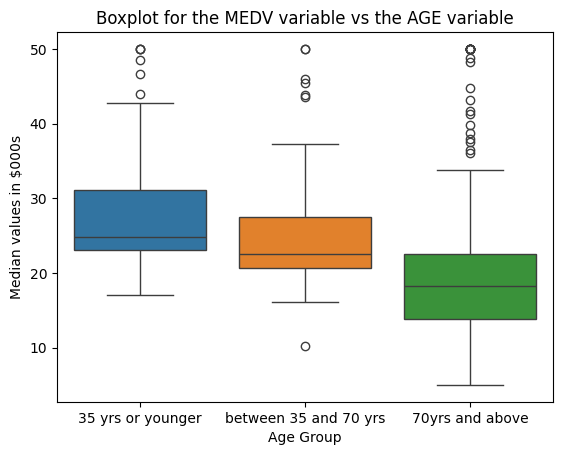

In [12]:
#Discretizing the age variable
bins = [0,35,70,100]
labels = ['35 yrs or younger', 'between 35 and 70 yrs', '70yrs and above']

boston_df['age_group'] = pd.cut(boston_df['AGE'], bins = bins, labels = labels, include_lowest = True)

sns.boxplot(x= 'age_group' , y = 'MEDV', data = boston_df, hue = 'age_group')

plt.title('Boxplot for the MEDV variable vs the AGE variable')
plt.ylabel('Median values in $000s')
plt.xlabel('Age Group')
plt.show()

**Findings:**
1. Median for the age group 35yrs or younger tends to be around USD 25K, which is the highest amongst the three age groups.
2. Median is decreasing as the age of the owner occupied units is increasing with median for the age group 'between 35 and 70yrs' being USD 22K and for the age group '70yrs and above' being USD 18-19K implying newer homes being more expensive.
3. Distribution for age group 70yrs and above seems to be right skewed with long tail of expensive old homes.

**Ques.4: Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?**

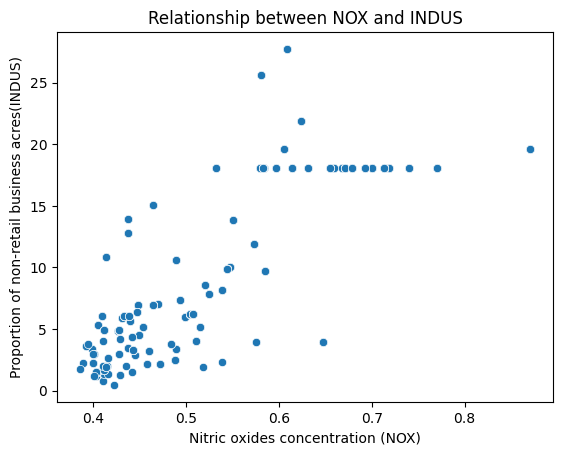

In [13]:
sns.scatterplot(x= 'NOX', y = 'INDUS', data = boston_df)
plt.title('Relationship between NOX and INDUS')
plt.xlabel('Nitric oxides concentration (NOX)')
plt.ylabel('Proportion of non-retail business acres(INDUS)')
plt.show()

**Findings:**
1. We can observe a positive correlation between NOX and INDUS variables since the data points in the plot indicate an upward trend.

**Ques. 5: Create a histogram for the pupil to teacher ratio variable.**

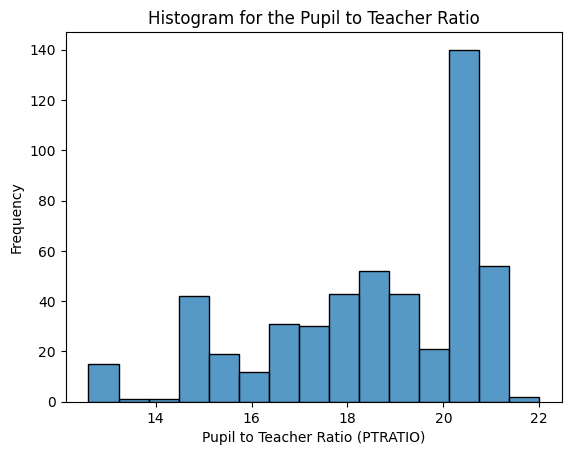

In [14]:
sns.histplot(x = 'PTRATIO', data = boston_df, bins = 15)
plt.title('Histogram for the Pupil to Teacher Ratio')
plt.xlabel('Pupil to Teacher Ratio (PTRATIO)')
plt.ylabel('Frequency')
plt.show()

**Findings:**
1. Single peak between PTRATIO 20-22 indicates most towns cluster around this specific pupil to teacher ratio.
2. Distribution seems to be left-skewed due to long left side tail.
3. Most PTRATIO values concentrate around 14-22 suggesting relative consistency across towns.

# Task 3: Use the appropriate tests to answer the questions provided.

**Ques. 1: Is there a significant difference in median value of houses bounded by the Charles river or not?**

Before running the t-test, we will check for Levene's test to check for equal variances assumption.

Null Hypothesis: Variances are equal

Alternate Hypothesis: Unequal variances

α = 0.05

In [22]:
scipy.stats.levene(boston_df[boston_df['CHAS'] == 0]['MEDV'], boston_df[boston_df['CHAS'] == 1]['MEDV'], center = 'mean')

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

Since p-value is less than the siginificance level of 0.05, 
we can reject the null hypothesis of equal variances and conclude that variances are not equal.

Therefore, we will run the Welch's version of t-test below:

Null Hypothesis: There is no difference in median value of houses bounded by the Charles river

Alternate Hypothesis: There is a significant difference in median value of houses bounded by the Charles river

α = 0.05

In [25]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0]['MEDV'], boston_df[boston_df['CHAS'] == 1]['MEDV'], equal_var = False)

TtestResult(statistic=-3.113291312794837, pvalue=0.003567170098137517, df=36.876408797611994)

Conclusion:

Since p-value for the test is less than the significance level of 0.05, we can reject the null hypothesis and,

conclude that there is a statistically significant difference in the median value of houses bounded by the Charles river.

**Ques.2: Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)?**

Before running the ANOVA, we will check for Levene's test to check for equal variances assumption.

Null Hypothesis: Variances are equal

Alternate Hypothesis: Unequal variances

α = 0.05

In [27]:
scipy.stats.levene(boston_df[boston_df['age_group'] == '35 yrs or younger']['MEDV'], boston_df[boston_df['age_group'] == 'between 35 and 70 yrs']['MEDV'],boston_df[boston_df['age_group'] == '70yrs and above']['MEDV'])

LeveneResult(statistic=3.471820890881101, pvalue=0.031806778061338456)

Since p-value is less than the siginificance level of 0.05, 
we can reject the null hypothesis of equal variances and conclude that variances are not equal.

Therefore, we will run the Welch's version of ANOVA below (using Pingouin library):

Null Hypothesis: There is no difference in median value of houses for each proportion of owner occupied units built prior to 1940

Alternate Hypothesis: There is a siginificant difference in median value of houses for each proportion of owner occupied units built prior to 1940

(Performing ANOVA in this case since AGE has been discretized into 3 groups)
(Using alpha = 0.05)

In [31]:
pg.welch_anova(dv = 'MEDV', between='age_group', data = boston_df)

,Source,ddof1,ddof2,F,p-unc,np2
0,age_group,2,236.306336,38.577148,3.174708e-15,0.126456


Conclusion:

Since p-value is less than the significance level of 0.05, we can reject the null hypothesis, and

conclude that there is a statistically significant difference in the median value of houses built prior to 1940 between the three age groups.

**Ques. 3: Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town?**

Null hypothesis: There is no relationship between NOX and INDUS variables

Alternate hypothesis: There exists a relationship between NOX and INDUS variables

α = 0.05

In [35]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

Conclusion:

Since p-value is less than the significance level of 0.05, we can reject the null hypothesis, and

conclude that there exists a linear relationship between Nitric oxide concentrations (NOX) and proportion of non-retail business acres per town (INDUS).

**Ques. 4: What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes?**

In [37]:
X = boston_df['DIS']
Y = boston_df['MEDV']

X = sm.add_constant(X)

model = sm.OLS(Y,X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sun, 03 Aug 2025   Prob (F-statistic):           1.21e-08
Time:                        20:04:11   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Conclusion:

As per the OLS model summary, the coefficient for DIS variable is 1.0916, which means that for every one unit increase in the weighted distance to the five Boston employment centres (DIS), median value of owner-occupied homes (MEDV) will increase by USD 1,091.6 (since the MEDV variable is given in USD '000s).